Topological Data Analysis of beans
Iñigo Echeagaray Rodríguez

Copyright Kmapper

Special thanks to Dr. Hugo Villanueva

In this project, a dataset that contains data for 7 different kinds of dried beans will be analyzed using kmapper.

The dataset citation is given as: KOKLU, M. and OZKAN, I.A., (2020), Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques. Computers and Electronics in Agriculture, 174, 105507. DOI: https://doi.org/10.1016/j.compag.2020.105507.

In the given citation, one can visualize the original study, in which they also analize the dataset using matlab GUI with a multi layer perceptron, support vector machine, k nearest neighbors and decision trees, they also compare the different performances.

In this project, the dataset with the image features (not the images themselves) will be analyzed, features will be selected to achieve a good classification metric with kmapper.

#Imports

In [1]:
#Latest version of openpyxl to have a working pandas
!pip install openpyxl
#Install kmapper
!pip install kmapper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 7.4 MB/s 


In [2]:
import numpy as np
import pandas as pd
import kmapper as km
import sklearn

In [3]:
#Import dataset
Data=pd.read_excel("DriedBeansDataset.xlsx")
#Check for null values
Data.isnull().sum(axis=0)

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

We can see that there are no null values.

In [4]:
Data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [5]:
#Isolate the features
DataFeat=Data.drop('Class', axis=1)
#Isolate the classes
DataClass=Data[['Class']]

In [6]:
DataFeat

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


Turn classes to numerical ones for easier intepretation.

In [ ]:
#Create new dataframe for numerical features
DataClassNum=DataClass
#Start the numerical value each class will be assigned
j=0
for i in DataClass['Class'].unique():
  #For each class assign their numerical value
  DataClassNum[(DataClass['Class']==i)]=j
  #After each class, move to the next
  j=j+1

In [21]:
#Visualize new feature dataframe
DataClassNum

,Class
0,0
1,0
2,0
3,0
4,0
...,...
13606,6
13607,6
13608,6
13609,6


#Feature selection

Select features based on their standard deviation, those with the least deviation contain the least "information" (if they have little variability they don't really change from class to class, so they don't say much), those with low SD can be discarded, to do this however, we first need to scale the features, so that their deviation is comparable.

In [24]:
#Apply this to every column of the dataset of features
for col in DataFeat:
  #Save the max value of the column
  max=DataFeat[col].max()
  #Save the min value of the column
  min=DataFeat[col].min()
  #Make sure that the column has different values, that is, that its minimum value isn't the same as its maximum value
  if max!=min:
    #Make the feature column equal to the scaled feature column, the apply function is a function that goes through a whole array (in this case, column) and
    #applies a mathematical formula to each value x
    DataFeat[col]=DataFeat[col].apply(
        lambda value: (value-min)/(max-min)
        )
  #If the column is a column of all equal values, drop it, since it doesn't provide any info
  else:
    #Here, the argument axis=1 implies that the dropping will be made for a column, not a row (which would be axis=0, the default)
    DataFeat.drop(col,axis=1)

In [25]:
#Visualizar el dataset escalado
DataFeat

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.034053,0.058574,0.044262,0.152142,0.122612,0.477797,0.033107,0.070804,0.671024,0.922824,0.934823,0.786733,0.593432,0.833049,0.750996,0.980620
1,0.035500,0.077557,0.030479,0.178337,0.051577,0.278472,0.034991,0.073577,0.735504,0.871514,0.793138,0.903549,0.547447,0.967315,0.884987,0.974979
2,0.038259,0.068035,0.052633,0.158190,0.131521,0.496448,0.037126,0.078816,0.716671,0.932141,0.914511,0.773514,0.582016,0.800942,0.736200,0.987196
3,0.040940,0.082942,0.048548,0.177691,0.091623,0.403864,0.041389,0.083854,0.731365,0.761614,0.826871,0.829912,0.552408,0.854744,0.799846,0.893675
4,0.041504,0.065313,0.032862,0.200679,0.025565,0.165680,0.040123,0.084906,0.700538,0.949832,0.988408,0.951583,0.510741,1.000000,0.941770,0.989116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,0.092559,0.160862,0.189318,0.187843,0.375584,0.788553,0.089967,0.172180,0.512286,0.942381,0.852151,0.465175,0.531785,0.382135,0.412185,0.974113
13607,0.092576,0.159358,0.176450,0.201964,0.321303,0.746241,0.089910,0.172207,0.786890,0.947954,0.862952,0.523974,0.509582,0.426233,0.470848,0.970912
13608,0.092739,0.160605,0.176384,0.203370,0.318558,0.743877,0.090219,0.172463,0.561689,0.936648,0.855785,0.525351,0.508683,0.427019,0.472240,0.943025
13609,0.092773,0.163657,0.179703,0.200669,0.330472,0.753971,0.090623,0.172517,0.482741,0.908991,0.834795,0.510145,0.514216,0.415330,0.456919,0.913342


In [26]:
DataFeat.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,0.139320,0.226304,0.245905,0.236190,0.397295,0.768181,0.136386,0.224978,0.625380,0.900112,0.765693,0.459403,0.493356,0.371445,0.413253,0.910285
std,0.125212,0.146710,0.154332,0.133171,0.175517,0.132860,0.122744,0.144996,0.157895,0.061783,0.118786,0.177989,0.147006,0.192168,0.175392,0.083898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067926,0.122404,0.125531,0.157944,0.289902,0.717685,0.066084,0.131880,0.525344,0.880592,0.683497,0.351551,0.406861,0.190064,0.302997,0.884146
50%,0.103469,0.184992,0.204017,0.207054,0.374443,0.787743,0.100974,0.189141,0.657953,0.915228,0.785402,0.463478,0.503986,0.364216,0.410514,0.935698
75%,0.174691,0.309781,0.347394,0.279902,0.485429,0.854208,0.171533,0.289620,0.744779,0.938164,0.852681,0.558634,0.585601,0.517962,0.506118,0.964454
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
#Create the array to save the names of columns that will be used
column_array=[]
#Apply this to every column of the dataset of scaled features
for col in DataFeat:
  #Obtain the Standard Deviation of the feature column
  FeatureStandardDeviation = DataFeat[col].std()
  #If the Standard Deviation of the feature column is over 0.1
  if FeatureStandardDeviation >= 0.1:
     #save the feature column name to the column array
    column_array.append(col)
#Display the columns to be used
column_array

['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'AspectRation',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Extent',
 'roundness',
 'Compactness',
 'ShapeFactor1',
 'ShapeFactor2',
 'ShapeFactor3']

In [32]:
#NewDataFrame with the features we will use
DataFeatAnalysis=DataFeat[column_array]
#Visualize new dataframe
DataFeatAnalysis

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3
0,0.034053,0.058574,0.044262,0.152142,0.122612,0.477797,0.033107,0.070804,0.671024,0.934823,0.786733,0.593432,0.833049,0.750996
1,0.035500,0.077557,0.030479,0.178337,0.051577,0.278472,0.034991,0.073577,0.735504,0.793138,0.903549,0.547447,0.967315,0.884987
2,0.038259,0.068035,0.052633,0.158190,0.131521,0.496448,0.037126,0.078816,0.716671,0.914511,0.773514,0.582016,0.800942,0.736200
3,0.040940,0.082942,0.048548,0.177691,0.091623,0.403864,0.041389,0.083854,0.731365,0.826871,0.829912,0.552408,0.854744,0.799846
4,0.041504,0.065313,0.032862,0.200679,0.025565,0.165680,0.040123,0.084906,0.700538,0.988408,0.951583,0.510741,1.000000,0.941770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,0.092559,0.160862,0.189318,0.187843,0.375584,0.788553,0.089967,0.172180,0.512286,0.852151,0.465175,0.531785,0.382135,0.412185
13607,0.092576,0.159358,0.176450,0.201964,0.321303,0.746241,0.089910,0.172207,0.786890,0.862952,0.523974,0.509582,0.426233,0.470848
13608,0.092739,0.160605,0.176384,0.203370,0.318558,0.743877,0.090219,0.172463,0.561689,0.855785,0.525351,0.508683,0.427019,0.472240
13609,0.092773,0.163657,0.179703,0.200669,0.330472,0.753971,0.090623,0.172517,0.482741,0.834795,0.510145,0.514216,0.415330,0.456919


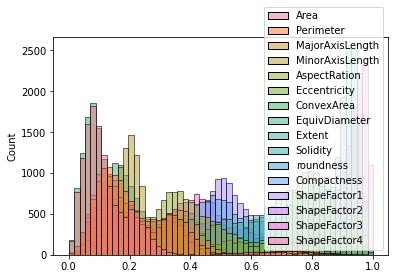

In [33]:
#Seaborn for creating a histplot
import seaborn as sns
#Create the histplot
sns.histplot(DataFeat)

There is good variability in the features, we can work with these.

#Mapper implementation

##Array preparation

In [34]:
#Array of features
X=np.array(DataFeatAnalysis)
#Visualize
X

array([[0.03405267, 0.05857388, 0.04426214, ..., 0.59343158, 0.83304879,
        0.75099637],
       [0.03550018, 0.07755673, 0.03047881, ..., 0.547447  , 0.96731548,
        0.88498696],
       [0.03825855, 0.06803484, 0.05263303, ..., 0.5820159 , 0.80094229,
        0.7361995 ],
       ...,
       [0.09273856, 0.16060492, 0.17638393, ..., 0.50868338, 0.42701895,
        0.4722397 ],
       [0.09277272, 0.16365701, 0.17970258, ..., 0.51421602, 0.41532999,
        0.45691893],
       [0.09282396, 0.16944765, 0.20088207, ..., 0.55032016, 0.34689166,
        0.36476185]])

In [41]:
#Array of classes
y=np.array(DataClassNum['Class'])
#Visualize
y

array([0, 0, 0, ..., 6, 6, 6], dtype=object)

##Algoritmo

In [43]:
#Call mapper with verbose of 2, to start sepparating the data
mapper=km.KeplerMapper(verbose=2)

KeplerMapper(verbose=2)


In [44]:
#The l2norm filter will calculate the euclidean vector distance of the data and "sepparate" data that are very far from the origin, basically making a data cloud
lens = mapper.fit_transform(X,projection="l2norm")

..Composing projection pipeline of length 1:
	Projections: l2norm
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (13611, 14)

..Projecting data using: l2norm

..Scaling with: MinMaxScaler()



In [45]:
graph = mapper.map(
    lens,
    X,
    #Agglomerative clustering, this works by making a cluster of each point and then fusing similar clusters, this will help distinguish between the beans, we use
    #14 clusters to get at least 2 clusters per class, in an effort to properly split them
    clusterer=sklearn.cluster.AgglomerativeClustering(n_clusters=14),
    #7 hypercubes for the 7 classes
    #Overlap of only 0.4, so the hypercubes don't overlap too much
    cover=km.Cover(n_cubes=7, perc_overlap=0.4),
)

mapper.visualize(graph, path_html="Beans.html",custom_tooltips=y)

Mapping on data shaped (13611, 14) using lens shaped (13611, 1)

Minimal points in hypercube before clustering: 14
Creating 7 hypercubes.
   > Found 14 clusters in hypercube 0.
   > Found 14 clusters in hypercube 1.
   > Found 14 clusters in hypercube 2.
   > Found 14 clusters in hypercube 3.
   > Found 14 clusters in hypercube 4.
   > Found 14 clusters in hypercube 5.
   > Found 14 clusters in hypercube 6.

Created 166 edges and 98 nodes in 0:00:14.364381.
Wrote visualization to: Beans.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Kepler Mapper | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weigh

The most distinct bean is number 1, it even has the most variability of any bean among itself (bean 1 has almost as much variability between eachother as the whole dataset), it's followed by bean 5, 4, 0, 2, and then 6 and 3, which are very similar among eachother.